In [ ]:
!pip install yfinance
!pip install backtesting
!pip install chainer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173804 sha256=f22ff26467faaf9f3f678a1dc4e069cbcc64a381b4bd616cce565c9b21f7863b
  Stored in directory: /root/.cache/pip/wheels/e2/30/7f/19cbe31987c6ebdb47f1f510343249066711609e3da2d57176
Successfully built backtesting
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 29.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for chainer: filename=chainer-7.8.1-py3-none-any.whl size=967722 sha256=9fb5b40ea17885341ebfef9f7b69da67dc103d636531a8acab4123479947b45a
  Stored 

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import time
import copy
import numpy as np
import pandas as pd
import chainer
import chainer.functions as F
import chainer. links as L
from plotly import tools
from plotly.graph_objs import *
from plotly import plot
import yfinance as yf

In [ ]:
df = yf.download("^STI", start='2019-01-01',end='2022-12-31')
train_original = df['2019-01-01':'2021-12-31']
test_original = df['2022-01-01':'2022-12-31']
train = train_original
test = test_original

[*********************100%***********************]  1 of 1 completed


In [ ]:
train

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,3072.989990,3081.010010,3028.840088,3038.889893,3038.889893,163939400
2019-01-03,3022.270020,3041.030029,3002.399902,3012.879883,3012.879883,200782100
2019-01-04,2994.020020,3059.229980,2993.419922,3059.229980,3059.229980,180767500
2019-01-07,3101.260010,3104.320068,3084.879883,3102.800049,3102.800049,238077400
2019-01-08,3108.379883,3126.639893,3099.330078,3122.939941,3122.939941,180645400
...,...,...,...,...,...,...
2021-12-27,3107.629883,3113.550049,3104.239990,3104.239990,3104.239990,81421800
2021-12-28,3110.820068,3128.919922,3108.929932,3128.409912,3128.409912,86856900
2021-12-29,3135.389893,3140.520020,3132.870117,3138.020020,3138.020020,90618100


In [ ]:
class Environment1:
    def __init__(self, data, history_t=90):
        self.data = data
        self.history_t = history_t
        self.cash = 10000
        self.position = [0,0]
        self.cur_price = 0
        self.reset()

    def reset(self):
        self.t = 0
        self.done = False
        self.cash = 10000
        self.cur_price = self.data.iloc[0, :]['Close']
        self.position = [0,0]
        self.position_value = 0
        self.history = [0 for _ in range(self.history_t)]
        return [self.position_value] + self.history #obs

    def step(self, act):
        #print(act)
        self.cur_price = self.data.iloc[self.t, :]['Close']
        reward = 0
        #act = 1: buy 0: sell
        if act == 1:

            if(self.position[0]>0):
              pass
            else:
              num_share = np.floor(self.cash/self.cur_price)
              self.position = [num_share,self.cur_price]
              #print(self.position)
              self.cash -= (num_share*self.cur_price)
            self.position_value = (self.cur_price - self.position[1])

        elif act == 0: # sell

            if self.position[0] > 0:
                self.cash += self.position[0]*self.cur_price
                reward = self.cur_price - self.position[1]
                self.position = [0,0]
                #print(self.position)
            else:
               pass
            self.position_value = 0

        self.t += 1
        self.history.pop(0)
        self.history.append(self.data.iloc[self.t, :]['Close'] - self.data.iloc[ (self.t-1), :]['Close'])
        return [self.position_value] + self.history, reward, self.done # obs, reward, done

In [ ]:
env_train = Environment1(train)
print(env_train.reset())
for _ in range (3):
  pact = np.random.randint(2)
  print(env_train.step(pact))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
([0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -26.010009765625], 0, False)
([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -26.010009765625, 46.35009765625], -26.010009765625, False)
([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
def train_dqn(env):
    class Q_Network(chainer.Chain):
      def __init__(self, input_size, hidden_size, output_size):
          super(Q_Network, self).__init__(
          fc1 = L.Linear (input_size, hidden_size),
          fc2 = L.Linear (hidden_size, hidden_size),
          fc3 = L.Linear(hidden_size, output_size))
      def __call__(self, x):
        h = F.relu(self.fc1(x))
        h = F.relu(self.fc2(h))
        y = self.fc3(h)
        return y
      def reset(self):
        self. zerograds ()
    epoch_list = []
    log_reward_list = []
    log_loss_list = []
    Q = Q_Network(input_size = env.history_t+1, hidden_size=100, output_size=2)
    Q_ast = copy.deepcopy (Q)
    optimizer = chainer.optimizers.Adam()
    optimizer.setup (Q)

    epoch_num = 70
    step_max = len(env.data)-1
    memory_size = 200
    batch_size = 20
    epsilon = 1.0
    epsilon_decrease = 1e-3
    epsilon_min = 0.1
    start_reduce_epsilon = 200
    train_freq = 10
    update_q_freq = 20
    gamma = 0.97
    show_log_freq = 5

    memory = []
    total_step = 0
    total_rewards = []
    total_losses = []
    start = time.time ()
    for epoch in range(epoch_num):
        pobs = env.reset ()
        step = 0
        done = False
        total_reward = 0
        total_loss = 0

        while not done and step<step_max:
# select act
            pact = np.random.randint(2)
            if np.random.rand() > epsilon:
                pact = Q(np. array (pobs, dtype=np.float32).reshape (1, -1))
                #print('pact: '+pact)
                pact = np.argmax(pact.data)
    # act

            obs, reward, done = env.step(pact)
# add memory
            memory.append((pobs, pact, reward, obs, done))
            if len (memory) > memory_size:
                memory.pop(0)
# train or update g
            if len(memory) == memory_size:
              if total_step % train_freq == 0:
                  shuffled_memory = np.random.permutation(memory)
                  memory_idx = range(len(shuffled_memory))
                  for i in memory_idx[::batch_size]:
                      batch = np.array(shuffled_memory[i:i+batch_size])
                      b_pobs = np.array (batch[:,0].tolist(), dtype=np.float32).reshape(batch_size, -1)
                      b_pact = np.array(batch[:, 1].tolist (), dtype=np.int32)
                      b_reward = np.array(batch[:, 2].tolist(), dtype=np.int32)
                      b_obs = np.array(batch[:, 3].tolist(), dtype=np.float32).reshape (batch_size, -1)
                      b_done = np.array(batch[:, 4]. tolist(), dtype=np.bool)

                      q = Q(b_pobs)
                      maxq = np.max(Q_ast(b_obs).data, axis=1)
                      target = copy. deepcopy(q. data)
                      for j in range(batch_size):
                          target[j, b_pact[j]] = b_reward[j]+gamma*maxq[j]*(not b_done[j])
                      Q.reset ()
                      loss = F.mean_squared_error(q, target)
                      total_loss += loss.data
                      loss.backward()
                      optimizer.update()

              if total_step % update_q_freq == 0:
                              Q_ast = copy.deepcopy (Q)

            if epsilon > epsilon_min and total_step > start_reduce_epsilon:
                epsilon -= epsilon_decrease
            total_reward += reward
            pobs = obs
            step += 1
            total_step += 1
        total_rewards.append(total_reward)
        total_losses.append(total_loss)

        if(epoch+1) % show_log_freq == 0:
              log_reward = sum(total_rewards[((epoch+1)-show_log_freq):])/show_log_freq
              log_loss = sum(total_losses [((epoch+1)-show_log_freq) :])/show_log_freq
              elapsed_time = time.time()-start
              print('\t'.join(map(str, [epoch+1, epsilon, total_step, log_reward, log_loss, elapsed_time])))
              start - time.time ()
              epoch_list.append(epoch+1)
              log_reward_list.append(log_reward)
              log_loss_list.append(log_loss)



    return Q, total_losses, total_rewards, epoch_list,log_reward_list, log_loss_list

In [ ]:
Q, total_losses, total_rewards,epoch_list,log_reward_list, log_loss_list = train_dqn(env_train)

<ipython-input-12-c3f5b77a3b25>:65: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

<ipython-input-12-c3f5b77a3b25>:73: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



5	0.0999999999999992	3760	962.023974609375	103871.02751054763	33.134183168411255
10	0.0999999999999992	7520	2251.995068359375	122083.09576969147	70.86865901947021
15	0.0999999999999992	11280	2730.234228515625	117375.1690727234	106.78287124633789
20	0.0999999999999992	15040	2814.5013671875	108232.01710109711	143.0119457244873
25	0.0999999999999992	18800	2680.218701171875	93868.87518587112	177.61881732940674
30	0.0999999999999992	22560	2675.38291015625	65046.38178515434	213.7026240825653
35	0.0999999999999992	26320	2497.345166015625	72344.88943004608	249.9739842414856
40	0.0999999999999992	30080	3192.319384765625	72668.70298252106	284.4357395172119
45	0.0999999999999992	33840	2622.62626953125	86260.3500111103	322.3187081813812
50	0.0999999999999992	37600	2720.21640625	50645.86629114151	358.70004868507385
55	0.0999999999999992	41360	2851.304541015625	59965.94027309418	394.00805497169495
60	0.0999999999999992	45120	3085.3921875	56468.27205491066	430.56439781188965
65	0.0999999999999992	488

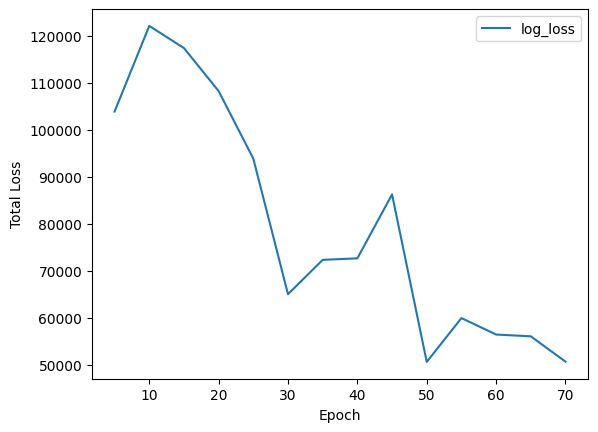

In [ ]:
import matplotlib.pyplot as plt
plt.plot(epoch_list, log_loss_list, label='log_loss')
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.legend()


In [ ]:
class TestAgent:
    def __init__(self, env, Q):
        self.env = env
        self.Q = Q
        self.actions=[]

    def test(self, test_data):
        obs = self.env.reset()
        done = False
        total_reward = 0

        for t in range(len(test_data["Close"])):

            action = np.argmax(self.Q(np.array(obs, dtype=np.float32).reshape(1, -1)).data)
            self.actions.append(action)
            obs, reward, done = self.env.step(action)
            total_reward += reward
            if done:
                break

        return total_reward,self.actions


In [ ]:
test

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,3130.479980,3138.270020,3127.600098,3134.250000,3134.250000,146570200
2022-01-04,3155.679932,3182.530029,3151.800049,3181.129883,3181.129883,357286900
2022-01-05,3187.570068,3196.600098,3154.959961,3163.439941,3163.439941,272019600
2022-01-06,3152.750000,3186.330078,3144.810059,3184.300049,3184.300049,243206100
2022-01-07,3199.669922,3209.399902,3190.610107,3205.260010,3205.260010,238174000
...,...,...,...,...,...,...
2022-12-23,3257.189941,3261.989990,3250.159912,3257.699951,3257.699951,99027700
2022-12-27,3277.580078,3277.939941,3264.030029,3266.379883,3266.379883,108508800
2022-12-28,3257.750000,3270.330078,3256.239990,3266.969971,3266.969971,121539700


In [ ]:
from chainer import serializers
class Q_Network(chainer.Chain):
      def __init__(self, input_size, hidden_size, output_size):
          super(Q_Network, self).__init__(
          fc1 = L.Linear (input_size, hidden_size),
          fc2 = L.Linear (hidden_size, hidden_size),
          fc3 = L.Linear(hidden_size, output_size))
      def __call__(self, x):
        h = F.relu(self.fc1(x))
        h = F.relu(self.fc2(h))
        y = self.fc3(h)
        return y
      def reset(self):
        self. zerograds ()


Q = Q_Network(input_size=91, hidden_size=100, output_size=2)
serializers.load_npz('/content/q_model_70epoch_2019.npz', Q)

In [ ]:
env_test = Environment1(test)
env_test.reset()
testAgent =  TestAgent(env_test,Q)
test1 = test[:-1]
#train1= train[:-1]
reward, test_actions = testAgent.test(test1)

In [ ]:
reward

517.380859375

In [ ]:
input = df["2022-01-01":"2022-12-31"][['Open','High','Low','Close','Volume']]
#input = df["2020-01-01":"2021-12-31"][['Open','High','Low','Close','Volume']]
#input = input/10
input = input[:-1]
#input["Signal"] = np.roll(np.array(test_actions),-1)
input["Signal"] = test_actions

In [ ]:
input

,Open,High,Low,Close,Volume,Signal
Date,,,,,,
2022-01-03,3130.479980,3138.270020,3127.600098,3134.250000,146570200,1
2022-01-04,3155.679932,3182.530029,3151.800049,3181.129883,357286900,1
2022-01-05,3187.570068,3196.600098,3154.959961,3163.439941,272019600,1
2022-01-06,3152.750000,3186.330078,3144.810059,3184.300049,243206100,1
2022-01-07,3199.669922,3209.399902,3190.610107,3205.260010,238174000,1
...,...,...,...,...,...,...
2022-12-22,3262.399902,3278.879883,3256.189941,3269.530029,150652000,1
2022-12-23,3257.189941,3261.989990,3250.159912,3257.699951,99027700,1
2022-12-27,3277.580078,3277.939941,3264.030029,3266.379883,108508800,1


In [ ]:
from backtesting import Backtest
from backtesting import Strategy


class RLStrategy(Strategy):
    tp_ratio = 150
    sl_ratio = 30
    def init(self):
        pass

    def next(self):
        price = self.data.Close[-1]
        if self.data.Signal == 0:
          if self.position.is_long:
              self.position.close()
              self.sell()
        elif self.data.Signal == 1:
          if self.position.is_short or not self.position:
              self.position.close()
              self.buy()


ticker = "^STI"
start_date = "2022-01-01"
end_date = "2022-12-30"

inputs = input[start_date:end_date]
bt = Backtest(inputs, RLStrategy, cash=10_000)
stats=bt.run()

stats

Start                     2022-01-03 00:00:00
End                       2022-12-29 00:00:00
Duration                    360 days 00:00:00
Exposure Time [%]                   99.196787
Equity Final [$]                 12175.451904
Equity Peak [$]                  12218.741699
Return [%]                          21.754519
Buy & Hold Return [%]                 3.66882
Return (Ann.) [%]                   22.043606
Volatility (Ann.) [%]               11.854143
Sharpe Ratio                          1.85957
Sortino Ratio                        3.331295
Calmar Ratio                         5.223971
Max. Drawdown [%]                   -4.219703
Avg. Drawdown [%]                    -1.17094
Max. Drawdown Duration       57 days 00:00:00
Avg. Drawdown Duration       13 days 00:00:00
# Trades                                   95
Win Rate [%]                        57.894737
Best Trade [%]                       5.058187
Worst Trade [%]                     -3.474912
Avg. Trade [%]                    

In [ ]:
from chainer import serializers

# Assume `Q` is your trained Q model
serializers.save_npz('q_model_70epoch_2019.npz', Q)

In [ ]:
bt.plot()

Row(id='1407', ...)

In [ ]:
def plot_loss_reward(total_losses, total_rewards):
    figure = tools.make_subplots (rows=1, cols=2, subplot_titles=('loss','reward'), print_grid=False)
    figure.append_trace(Scatter(y=total_losses, mode='lines', line=dict(color='skyblue')), 1, 1)
    figure.append_trace(Scatter(y=total_rewards, mode='lines', line=dict(color='orange')), 1, 2)
    figure ['layout']['xaxis1'].update (title='epoch')
    figure['layout']['xaxis2'].update(title='epoch')
    figure['layout'].update (height=400, width=900, showlegend=False)
    plot(figure)

In [ ]:
plot_loss_reward(total_losses, total_rewards)

TypeError: ignored

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_reward(total_losses, total_rewards):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    axs[0].plot(total_losses)
    axs[0].set_title('Loss')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Total Loss')
    axs[1].plot(total_rewards)
    axs[1].set_title('Reward')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Total Reward')
    plt.show()
